## Cloning Quasar

In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to C:\Users\domen\astroML_data
[=========================================]  12.82Mb / 12.82Mb   


In [2]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897)

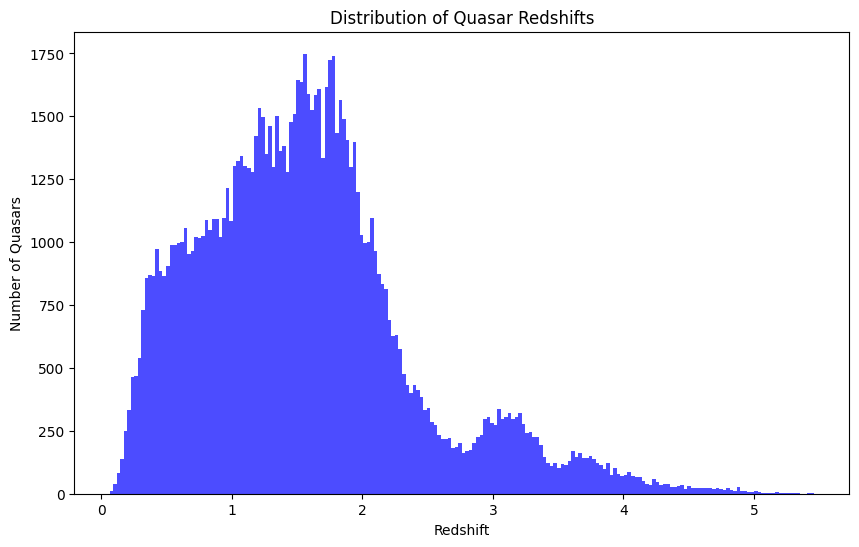

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
data_path = r"C:\Users\domen\astroML_data"


data = np.load(os.path.join(data_path, 'dr7_quasar.npy'))
plt.figure(figsize=(10, 6))
plt.hist(data['redshift'], bins=200, color='blue', alpha=0.7)
plt.xlabel('Redshift')
plt.ylabel('Number of Quasars')
plt.title('Distribution of Quasar Redshifts')
plt.show()

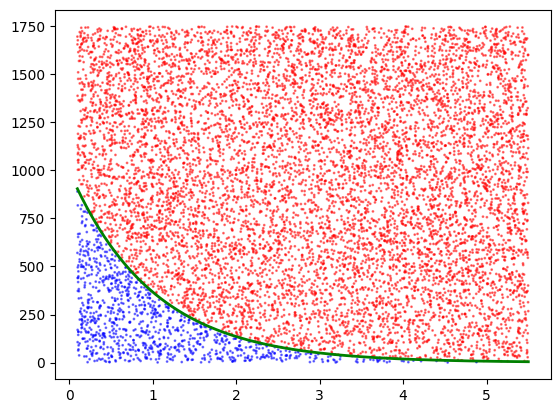

In [ ]:
from random import random

N = 10000
xmax = 5.5
xmin = 0.1
ymin = 0.0
ymax = 1750 
x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(ymin,ymax,N)
# Define the function
for i in range():
    if y > y_data
        
# Plot the points
plt.scatter(x, y, c=colors, s=1, alpha=0.5)
plt.plot(np.linspace(xmin, xmax, 1000), func(np.linspace(xmin, xmax, 1000)), color='green', linewidth=2)

plt.show()

In [ ]:
np.histogram(z, bins=np.linspace(0, 10, 10))
print()

(array([2929, 5355, 1496,  199,   21,    0,    0,    0,    0]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]))